Watershed

C:\Users\julie\AppData\Local\Temp\ipykernel_25856\603624915.py:17: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(distance_map, indices=False, min_distance=70, labels=thresh)


Text(0.5, 1.0, 'Watershed')

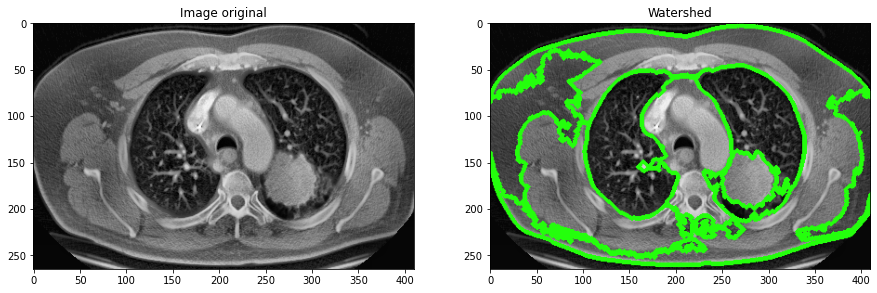

In [21]:
import cv2
import numpy as np
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage
import matplotlib.pyplot as plt

# On ouvre l'image "Cancer", convertit en nuance de grid, et effectue un seuillage "Otsu"
img_original=cv2.imread("Cancer_enh.png",0)
image = cv2.imread('Cancer_enh.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# On calcule l'ensemble des distances entre l'ensemble des pixels et les zéros les plus proches
# puis on trouve les sommets
distance_map = ndimage.distance_transform_edt(thresh)
local_max = peak_local_max(distance_map, indices=False, min_distance=70, labels=thresh)

# On performe un étiquetage des composantes connectées puis on applique le "Watershed"
markers = ndimage.label(local_max, structure=np.ones((3, 3)))[0]
labels = watershed(-distance_map, markers, mask=thresh)

# On itère sur chaque sommets
total_area = 0
for label in np.unique(labels):
    if label == 0:
        continue

    # Creation d'un masque
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255

    # Find contours and determine contour area
    # On cherche les contours
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    c = max(cnts, key=cv2.contourArea)
    cv2.drawContours(image, [c], -1, (36,255,12), 4)

# On affiche les images
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Image original')
plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title('Watershed')

Simple linear iterative clustering (SLIC)

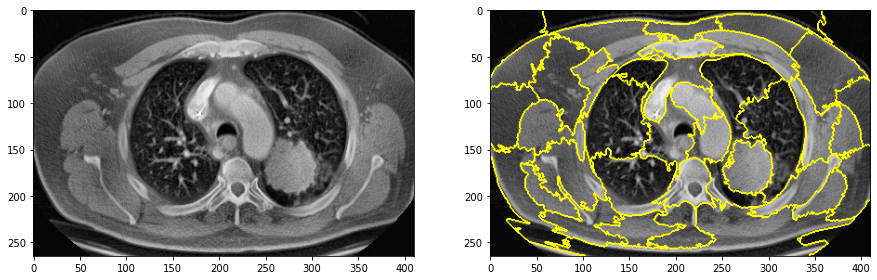

In [22]:
from skimage.segmentation import slic, mark_boundaries
import cv2
import matplotlib.pyplot as plt
 
# On ouvre l'image "Cancer"
img=cv2.imread("Cancer_enh.png",0)/255
 
# On applique le SLIC
img_segments = slic(img, n_segments=50,compactness=0.1)
 
# On affiche les images
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(img, img_segments))

Region growing

Text(0.5, 1.0, 'Region growing')

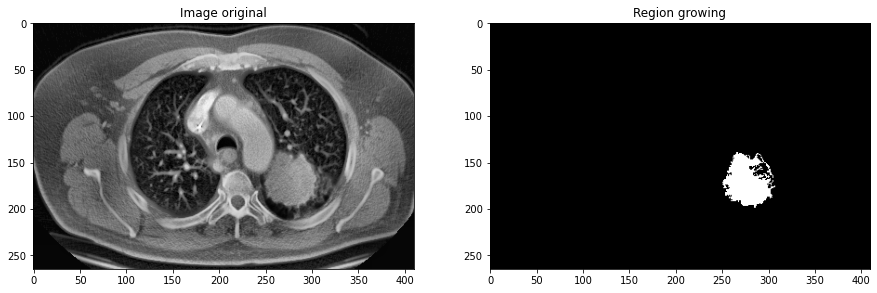

In [23]:
import matplotlib.pyplot as plt
import cv2
from skimage.segmentation import flood
from skimage.morphology import area_closing

# On ouvre l'image "Cancer"
img=cv2.imread('Cancer_enh.png',0)

# On applique un "flood" au niveau du pixel définit
light_coat = flood(img, seed_point=(175, 275), tolerance=20)

# On referme le contour définit par le "flood"
light_coat=area_closing(light_coat)

# On affiche les images
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Image original')
plt.subplot(1, 2, 2)
plt.imshow(light_coat, cmap='gray')
plt.title('Region growing')

Thresholding

Text(0.5, 1.0, 'Otsu')

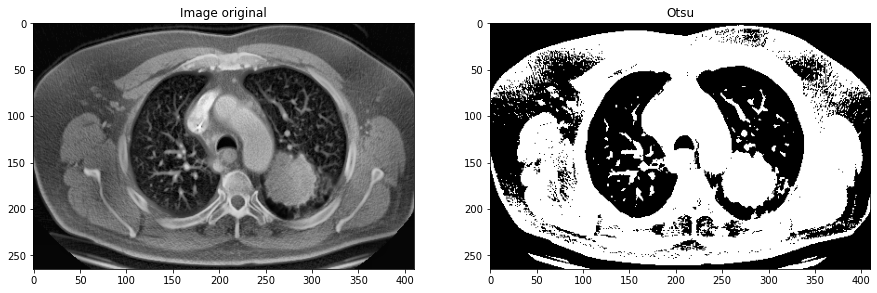

In [24]:
import matplotlib.pyplot as plt
import cv2

# On ouvre l'image "Cancer"
img=cv2.imread('Cancer_enh.png',0)

# On effectue le sueillage "Otsu"
ret, thresh = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  

# On affiche les images
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Image original')
plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Otsu')